In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

/home/mr_robot/miniconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# read the csv data into a pandas dataframe and set the date as the index
df = pd.read_csv('end-part2_df.csv').set_index('date')

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,997.0,13.129388,10.971591,-17.0,5.0,15.0,22.00,32.00
maxtempm,997.0,19.509529,11.577275,-12.0,11.0,22.0,29.00,38.00
mintempm,997.0,6.438315,10.957267,-27.0,-2.0,7.0,16.00,26.00
meantempm_1,997.0,13.109328,10.984613,-17.0,5.0,15.0,22.00,32.00
meantempm_2,997.0,13.088265,11.001106,-17.0,5.0,14.0,22.00,32.00
meantempm_3,997.0,13.066199,11.017312,-17.0,5.0,14.0,22.00,32.00
meandewptm_1,997.0,6.440321,10.596265,-22.0,-2.0,7.0,16.00,24.00
meandewptm_2,997.0,6.420261,10.606550,-22.0,-2.0,7.0,16.00,24.00
meandewptm_3,997.0,6.393180,10.619083,-22.0,-2.0,7.0,16.00,24.00
meanpressurem_1,997.0,1016.139418,7.582453,989.0,1011.0,1016.0,1021.00,1040.00


In [3]:
# execute the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2015-01-04 to 2017-09-27
Data columns (total 39 columns):
meantempm          997 non-null int64
maxtempm           997 non-null int64
mintempm           997 non-null int64
meantempm_1        997 non-null float64
meantempm_2        997 non-null float64
meantempm_3        997 non-null float64
meandewptm_1       997 non-null float64
meandewptm_2       997 non-null float64
meandewptm_3       997 non-null float64
meanpressurem_1    997 non-null float64
meanpressurem_2    997 non-null float64
meanpressurem_3    997 non-null float64
maxhumidity_1      997 non-null float64
maxhumidity_2      997 non-null float64
maxhumidity_3      997 non-null float64
minhumidity_1      997 non-null float64
minhumidity_2      997 non-null float64
minhumidity_3      997 non-null float64
maxtempm_1         997 non-null float64
maxtempm_2         997 non-null float64
maxtempm_3         997 non-null float64
mintempm_1         997 non-null float64
mintempm_2

In [4]:
# First drop the maxtempm and mintempm from the dataframe
df = df.drop(['mintempm', 'maxtempm'], axis=1)

# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'meantempm']]

# y will be a pandas series of the meantempm
y = df['meantempm']

In [5]:
# split data into training set and a temporary set
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [6]:
# split the remaining 20% of data evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print('Training instances   {}, Training features   {}'.format(X_train.shape[0], X_train.shape[1]))
print('Validation instances {}, Validation features {}'.format(X_val.shape[0], X_val.shape[1]))
print('Testing instances    {}, Testing features    {}'.format(X_test.shape[0], X_test.shape[1]))

Training instances   797, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [7]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [8]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdb769cb0f0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [10]:
evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 74956.71, step = 1
INFO:tensorflow:global_step/sec: 39.2125
INFO:tensorflow:loss = 9554.49, step = 101 (2.539 sec)
INFO:tensorflow:global_step/sec: 42.6456
INFO:tensorflow:loss = 9674.244, step = 201 (2.344 sec)
INFO:tensorflow:global_step/sec: 42.1433
INFO:tensorflow:loss = 9563.883, step = 301 (2.373 sec)
INFO:tensorflow:Saving checkpoints for 400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 8541.435.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:14:43
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-400
INFO:tensorflow:Finished evaluation at 2018-04-23-00:14:44
INFO:tensorflow:Saving dict for global step 400: average_loss = 19.099987, global_step = 400, loss = 1909.9988
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-400
INFO:tensorflow:Saving c

INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-3600
INFO:tensorflow:Finished evaluation at 2018-04-23-00:16:37
INFO:tensorflow:Saving dict for global step 3600: average_loss = 12.573047, global_step = 3600, loss = 1257.3047
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-3600
INFO:tensorflow:Saving checkpoints for 3601 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5957.549, step = 3601
INFO:tensorflow:global_step/sec: 37.1302
INFO:tensorflow:loss = 6842.0645, step = 3701 (2.696 sec)
INFO:tensorflow:global_step/sec: 38.4126
INFO:tensorflow:loss = 6452.086, step = 3801 (2.603 sec)
INFO:tensorflow:global_step/sec: 38.9213
INFO:tensorflow:loss = 7405.0986, step = 3901 (2.569 sec)
INFO:tensorflow:Saving checkpoints for 4000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 6202.8164.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:16:51
INFO:tensorflow:Restoring parameters from tf_wx_mo

INFO:tensorflow:loss = 5599.3867, step = 7001 (2.416 sec)
INFO:tensorflow:global_step/sec: 42.9562
INFO:tensorflow:loss = 6945.665, step = 7101 (2.328 sec)
INFO:tensorflow:Saving checkpoints for 7200 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 6362.8477.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:18:40
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-7200
INFO:tensorflow:Finished evaluation at 2018-04-23-00:18:40
INFO:tensorflow:Saving dict for global step 7200: average_loss = 11.57027, global_step = 7200, loss = 1157.027
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-7200
INFO:tensorflow:Saving checkpoints for 7201 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 6348.8047, step = 7201
INFO:tensorflow:global_step/sec: 36.7982
INFO:tensorflow:loss = 5333.754, step = 7301 (2.721 sec)
INFO:tensorflow:global_step/sec: 38.4786
INFO:tensorflow:loss = 5731.95, step = 7401 (2.598 s

INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10400
INFO:tensorflow:Saving checkpoints for 10401 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5301.1543, step = 10401
INFO:tensorflow:global_step/sec: 36.9767
INFO:tensorflow:loss = 5688.2485, step = 10501 (2.707 sec)
INFO:tensorflow:global_step/sec: 42.7474
INFO:tensorflow:loss = 5137.905, step = 10601 (2.339 sec)
INFO:tensorflow:global_step/sec: 42.7825
INFO:tensorflow:loss = 6073.883, step = 10701 (2.337 sec)
INFO:tensorflow:Saving checkpoints for 10800 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5815.611.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:20:48
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-10800
INFO:tensorflow:Finished evaluation at 2018-04-23-00:20:48
INFO:tensorflow:Saving dict for global step 10800: average_loss = 10.93065, global_step = 10800, loss = 1093.065
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from t

INFO:tensorflow:Loss for final step: 5106.726.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:22:41
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-14000
INFO:tensorflow:Finished evaluation at 2018-04-23-00:22:42
INFO:tensorflow:Saving dict for global step 14000: average_loss = 10.712717, global_step = 14000, loss = 1071.2717
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-14000
INFO:tensorflow:Saving checkpoints for 14001 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5651.6543, step = 14001
INFO:tensorflow:global_step/sec: 37.2547
INFO:tensorflow:loss = 5488.996, step = 14101 (2.687 sec)
INFO:tensorflow:global_step/sec: 38.5984
INFO:tensorflow:loss = 5399.013, step = 14201 (2.591 sec)
INFO:tensorflow:global_step/sec: 38.7533
INFO:tensorflow:loss = 5519.6997, step = 14301 (2.580 sec)
INFO:tensorflow:Saving checkpoints for 14400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5643

INFO:tensorflow:loss = 4846.618, step = 17201
INFO:tensorflow:global_step/sec: 37.0028
INFO:tensorflow:loss = 5080.96, step = 17301 (2.705 sec)
INFO:tensorflow:global_step/sec: 38.0698
INFO:tensorflow:loss = 5444.288, step = 17401 (2.627 sec)
INFO:tensorflow:global_step/sec: 38.7372
INFO:tensorflow:loss = 6423.6934, step = 17501 (2.582 sec)
INFO:tensorflow:Saving checkpoints for 17600 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5522.123.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:24:49
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-17600
INFO:tensorflow:Finished evaluation at 2018-04-23-00:24:49
INFO:tensorflow:Saving dict for global step 17600: average_loss = 10.761505, global_step = 17600, loss = 1076.1505
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-17600
INFO:tensorflow:Saving checkpoints for 17601 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5308.9707, step = 17

INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-20800
INFO:tensorflow:Finished evaluation at 2018-04-23-00:26:42
INFO:tensorflow:Saving dict for global step 20800: average_loss = 10.408874, global_step = 20800, loss = 1040.8873
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-20800
INFO:tensorflow:Saving checkpoints for 20801 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5426.7163, step = 20801
INFO:tensorflow:global_step/sec: 37.642
INFO:tensorflow:loss = 5029.782, step = 20901 (2.659 sec)
INFO:tensorflow:global_step/sec: 38.9321
INFO:tensorflow:loss = 5098.5684, step = 21001 (2.568 sec)
INFO:tensorflow:global_step/sec: 38.7227
INFO:tensorflow:loss = 5619.6855, step = 21101 (2.583 sec)
INFO:tensorflow:Saving checkpoints for 21200 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5609.8896.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:26:55
INFO:tensorflow:Restoring parameters fro

INFO:tensorflow:global_step/sec: 38.3041
INFO:tensorflow:loss = 4822.1157, step = 24201 (2.611 sec)
INFO:tensorflow:global_step/sec: 38.9954
INFO:tensorflow:loss = 5394.3467, step = 24301 (2.564 sec)
INFO:tensorflow:Saving checkpoints for 24400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5404.5005.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:28:49
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-24400
INFO:tensorflow:Finished evaluation at 2018-04-23-00:28:50
INFO:tensorflow:Saving dict for global step 24400: average_loss = 10.205142, global_step = 24400, loss = 1020.5142
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-24400
INFO:tensorflow:Saving checkpoints for 24401 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5326.8833, step = 24401
INFO:tensorflow:global_step/sec: 37.1992
INFO:tensorflow:loss = 5133.5215, step = 24501 (2.691 sec)
INFO:tensorflow:global_step/sec: 38.73

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-27600
INFO:tensorflow:Saving checkpoints for 27601 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5387.177, step = 27601
INFO:tensorflow:global_step/sec: 41.0186
INFO:tensorflow:loss = 5122.4463, step = 27701 (2.440 sec)
INFO:tensorflow:global_step/sec: 42.5134
INFO:tensorflow:loss = 4936.9316, step = 27801 (2.352 sec)
INFO:tensorflow:global_step/sec: 42.8908
INFO:tensorflow:loss = 4651.489, step = 27901 (2.332 sec)
INFO:tensorflow:Saving checkpoints for 28000 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5633.871.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:30:56
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-28000
INFO:tensorflow:Finished evaluation at 2018-04-23-00:30:56
INFO:tensorflow:Saving dict for global step 28000: average_loss = 10.169123, global_step = 28000, loss = 1016.91223
INFO:tensorflow:Create CheckpointSaverHo

INFO:tensorflow:Saving checkpoints for 31200 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5478.741.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:32:49
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-31200
INFO:tensorflow:Finished evaluation at 2018-04-23-00:32:49
INFO:tensorflow:Saving dict for global step 31200: average_loss = 10.181253, global_step = 31200, loss = 1018.1253
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-31200
INFO:tensorflow:Saving checkpoints for 31201 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5246.801, step = 31201
INFO:tensorflow:global_step/sec: 37.2797
INFO:tensorflow:loss = 4972.673, step = 31301 (2.684 sec)
INFO:tensorflow:global_step/sec: 39.0277
INFO:tensorflow:loss = 5377.214, step = 31401 (2.563 sec)
INFO:tensorflow:global_step/sec: 43.0763
INFO:tensorflow:loss = 5421.9404, step = 31501 (2.321 sec)
INFO:tensorflow:Saving checkpoints for 316

INFO:tensorflow:Saving checkpoints for 34401 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5497.857, step = 34401
INFO:tensorflow:global_step/sec: 40.6492
INFO:tensorflow:loss = 5360.54, step = 34501 (2.462 sec)
INFO:tensorflow:global_step/sec: 42.2956
INFO:tensorflow:loss = 5075.1865, step = 34601 (2.365 sec)
INFO:tensorflow:global_step/sec: 42.8345
INFO:tensorflow:loss = 4551.56, step = 34701 (2.334 sec)
INFO:tensorflow:Saving checkpoints for 34800 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 5350.701.
INFO:tensorflow:Starting evaluation at 2018-04-23-00:34:55
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-34800
INFO:tensorflow:Finished evaluation at 2018-04-23-00:34:55
INFO:tensorflow:Saving dict for global step 34800: average_loss = 10.071591, global_step = 34800, loss = 1007.1592
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-34800
INFO:tensorflow:Saving checkpoints for 34801

INFO:tensorflow:Starting evaluation at 2018-04-23-00:36:46
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-38000
INFO:tensorflow:Finished evaluation at 2018-04-23-00:36:46
INFO:tensorflow:Saving dict for global step 38000: average_loss = 10.109882, global_step = 38000, loss = 1010.9882
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-38000
INFO:tensorflow:Saving checkpoints for 38001 into tf_wx_model/model.ckpt.
INFO:tensorflow:loss = 5309.3013, step = 38001
INFO:tensorflow:global_step/sec: 37.3882
INFO:tensorflow:loss = 5569.7676, step = 38101 (2.677 sec)
INFO:tensorflow:global_step/sec: 38.6494
INFO:tensorflow:loss = 5790.203, step = 38201 (2.587 sec)
INFO:tensorflow:global_step/sec: 38.656
INFO:tensorflow:loss = 4537.922, step = 38301 (2.588 sec)
INFO:tensorflow:Saving checkpoints for 38400 into tf_wx_model/model.ckpt.
INFO:tensorflow:Loss for final step: 4911.3574.
INFO:tensorflow:Starting evaluation at 20

In [11]:
evaluations[0]

{'average_loss': 19.099987, 'global_step': 400, 'loss': 1909.9988}

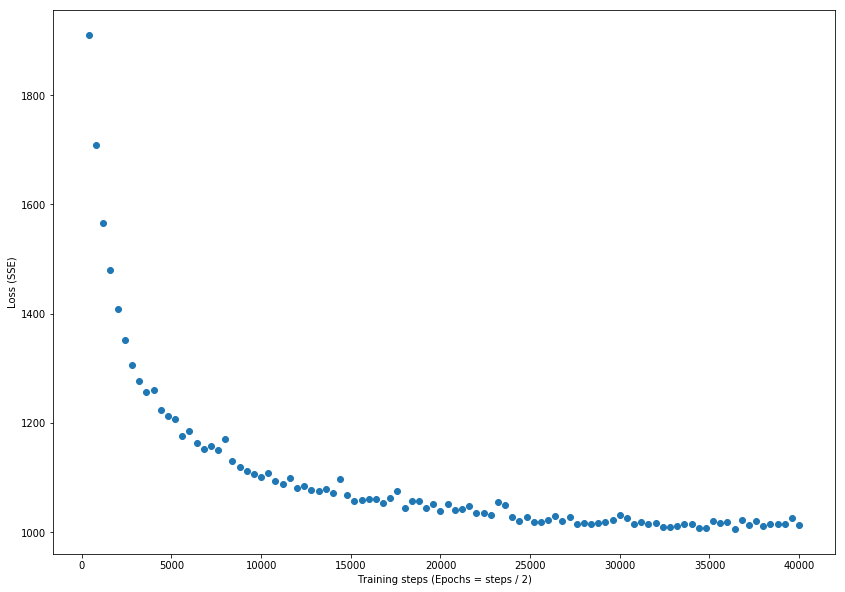

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to an appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [13]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print('The Explained Variance: %.2f' % explained_variance_score(y_test, predictions))
print('The Mean Absolute Error: %.2f degrees Celcius' % mean_absolute_error(y_test, predictions))
print('The Median Absolute Error: %.2f degrees Celcius' % median_absolute_error(y_test, predictions))

INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-40000
The Explained Variance: 0.89
The Mean Absolute Error: 3.01 degrees Celcius
The Median Absolute Error: 2.54 degrees Celcius
